In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

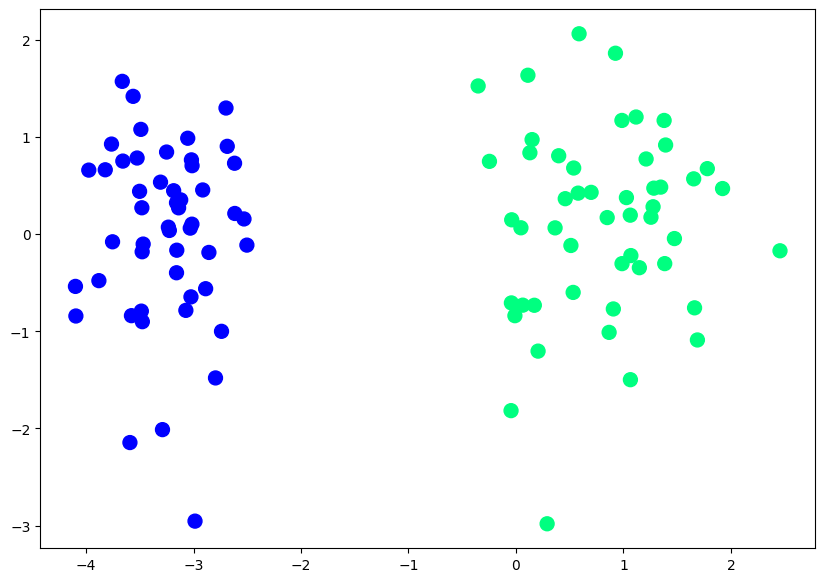

In [3]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)


C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\JANAK RAJ OJHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.82547199 0.21919894]]
[5.79535076]


In [6]:
m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

In [7]:
X_input=np.linspace(-3,3,100)
y_input=m1*X_input+b1

In [8]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5
    
    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]    
        

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
coef_,intercept_=gd(X,y)

In [11]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [12]:
X_input1=np.linspace(-3,3,100)
y_input1=m*X_input+b

(-3.0, 2.0)

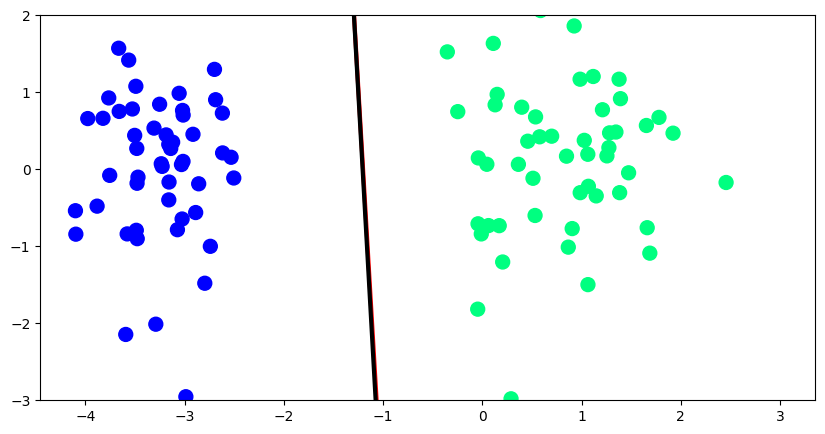

In [13]:
plt.figure(figsize=(10,5))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(X_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)